# Initial Hypotheses

- Do couples in longer relationships sleep in separate beds?
- Do older couples end up sleeping in separate beds?
- Are people with higher degrees sleeping separately?
- Which census region are couples more likely to sleep seperately?
- **BONUS**: Are people with stressful jobs sleeping separately? *Note: need to do a lot of cleaning for the occupation category. May require NLP to categorize 'Other' reponses. Will do after project is done if time permits*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_data, encode_cat_vars, split_data

plt.rc('figure', figsize=(9, 7))

plt.rc('font', size=13)

In [2]:
train, validate, test = split_data(wrangle_data())

In [3]:
train.head()

,rel_length,separate_bed,occupation,age,education,location,married,male
97,20+ years,0,"Life, Physical, and Social Science Occupations",45-60,Bachelor degree,East North Central,1,1
938,20+ years,0,"Life, Physical, and Social Science Occupations",45-60,Graduate degree,Pacific,1,0
937,20+ years,0,Legal Occupations,45-60,Graduate degree,Pacific,1,1
304,20+ years,0,Computer and Mathematical Occupations,30-44,Bachelor degree,Mountain,1,1
1090,0-5 years,0,Management Occupations,30-44,Bachelor degree,Middle Atlantic,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 97 to 160
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rel_length    557 non-null    object
 1   separate_bed  557 non-null    int64 
 2   occupation    557 non-null    object
 3   age           557 non-null    object
 4   education     557 non-null    object
 5   location      557 non-null    object
 6   married       557 non-null    uint8 
 7   male          557 non-null    uint8 
dtypes: int64(1), object(5), uint8(2)
memory usage: 31.5+ KB


# EDA

In [5]:
def plot_counts(df, col_a, col_b, title):
    plt.rc('figure', figsize=(16, 9))
    plt.subplot(211)

    sns.countplot(x = col_a, data=df, palette='Purples', ec='black', linewidth=2)

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')

    plt.subplot(212)

    # use hue to add another dimension to your viz
    sns.countplot(x = col_a, hue = col_b, data=df, palette='Blues', ec='black', linewidth=2)

    plt.legend()
    plt.tight_layout()
    plt.show()

### Target: Separate Beds

In [9]:
train.separate_bed.value_counts(normalize=True)

0    0.764811
1    0.235189
Name: separate_bed, dtype: float64

<div class="alert alert-block alert-info"><b>Summary</b>: About 24% of couples sleep separately according the the data*</div>

> **Do couples in longer relationships sleep in separate beds?**

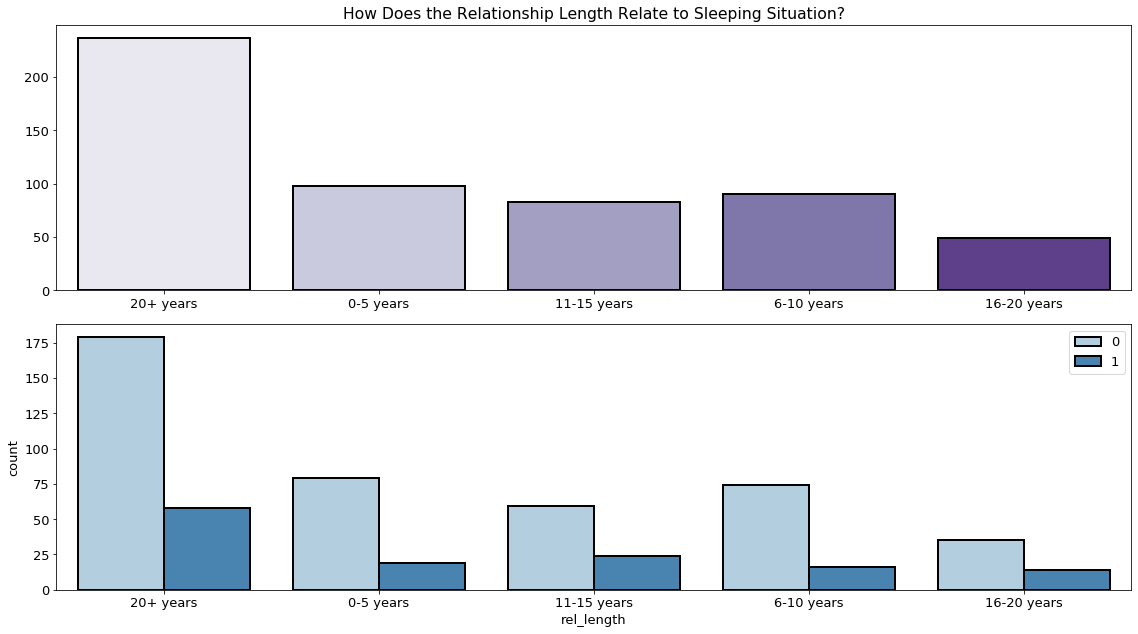

In [7]:
plot_counts(train, 'rel_length', 'separate_bed', 'How Does the Relationship Length Relate to Sleeping Situation?')

#### $Chi^2$ Test

In [97]:
# crosstab of target by age
len_obs = pd.crosstab(train.separate_bed, 
                      train.rel_length)
len_obs

rel_length,0-5 years,11-15 years,16-20 years,20+ years,6-10 years
separate_bed,,,,,
0,79,59,35,179,74
1,19,24,14,58,16


In [78]:
# Chi^2 test returns 4 variables
chi2, p, degf, expected = stats.chi2_contingency(len_obs)

null_hypothesis = "Relationship Length and Sleeping Sitation are independent"

# significance
alpha = .05

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

print(p)

We fail to reject the null hypothesis that Relationship Length and Sleeping Sitation are independent
0.31523451425551374


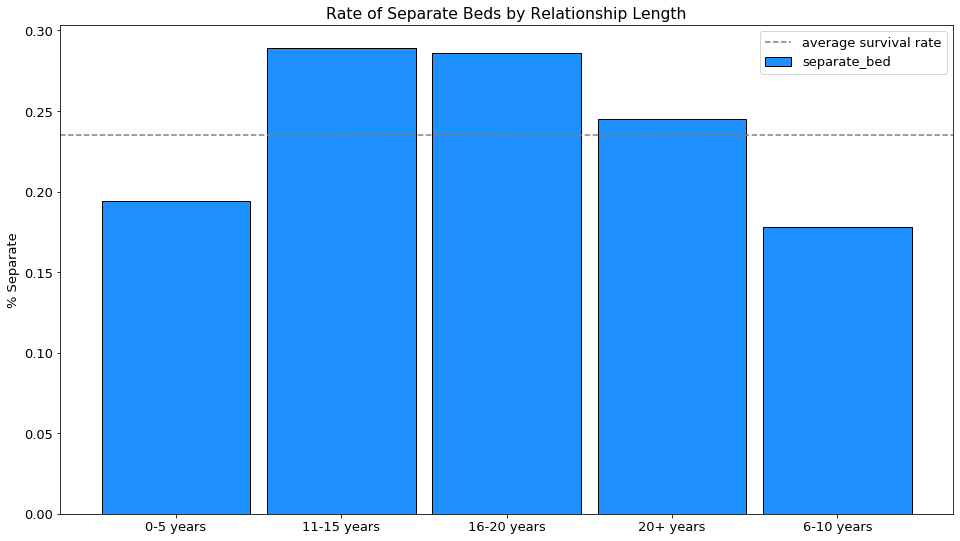

In [15]:
train.groupby('rel_length').separate_bed.mean().plot.bar(ec='black', 
                                                         fc='dodgerblue', width=.9)

# plt.hlines(height, starts, ends) (is like y, xmin, xmax)
plt.hlines(train.separate_bed.mean(), *plt.xlim(), ls='--', color='grey', 
           label='average separate bed rate')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('% Separate')
plt.title('Rate of Separate Beds by Relationship Length')

plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <b>Summary</b>: These relationship length groups surpass the mean for the population for couples in separate beds:
    <li>11-15 years</li>
    <li>16-20 years</li>
    <li>20+ years</li>
    $Chi^2$ Test determined that these are independent.
    </div>

> **Do older couples end up sleeping in separate beds?**

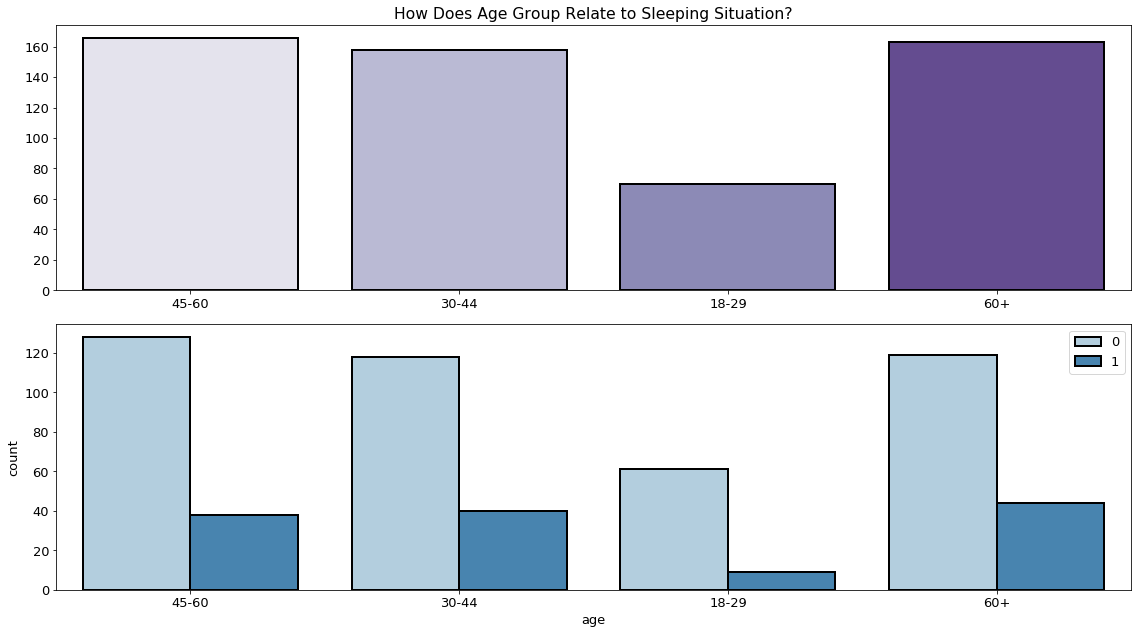

In [16]:
plot_counts(train, 'age', 'separate_bed', 'How Does Age Group Relate to Sleeping Situation?')

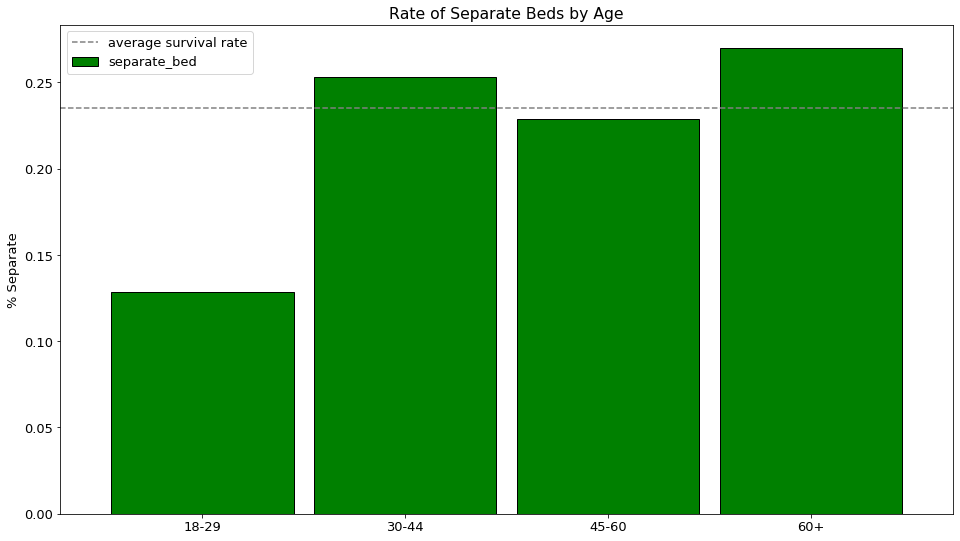

In [17]:
train.groupby('age').separate_bed.mean().plot.bar(ec='black', 
                                                  fc='green', width=.9)

# plt.hlines(height, starts, ends) (is like y, xmin, xmax)
plt.hlines(train.separate_bed.mean(), *plt.xlim(), ls='--', color='grey', 
           label='average separate bed rate')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('% Separate')
plt.title('Rate of Separate Beds by Age')

plt.legend()
plt.show()

#### $Chi^2$ Test

In [73]:
# crosstab of target by age
age_obs = pd.crosstab(train.separate_bed, train.age)
age_obs

age,18-29,30-44,45-60,60+
separate_bed,,,,
0,61,118,128,119
1,9,40,38,44


In [76]:
# Chi^2 test returns 4 variables
chi2, p, degf, expected = stats.chi2_contingency(age_obs)

null_hypothesis = "Age and Sleeping Sitation are independent"

# significance
alpha = .05

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

print(p)

We fail to reject the null hypothesis that Age and Sleeping Sitation are independent
0.11975865217615421


<div class="alert alert-block alert-info">
    <b>Summary</b>: These age groups surpass the mean for the population for couples in separate beds:
    <li>30-44</li>
    <li>60+</li>
    $Chi^2$ Test determined that these are independent.
      </div>

> **Are people with higher degrees sleeping separately?**

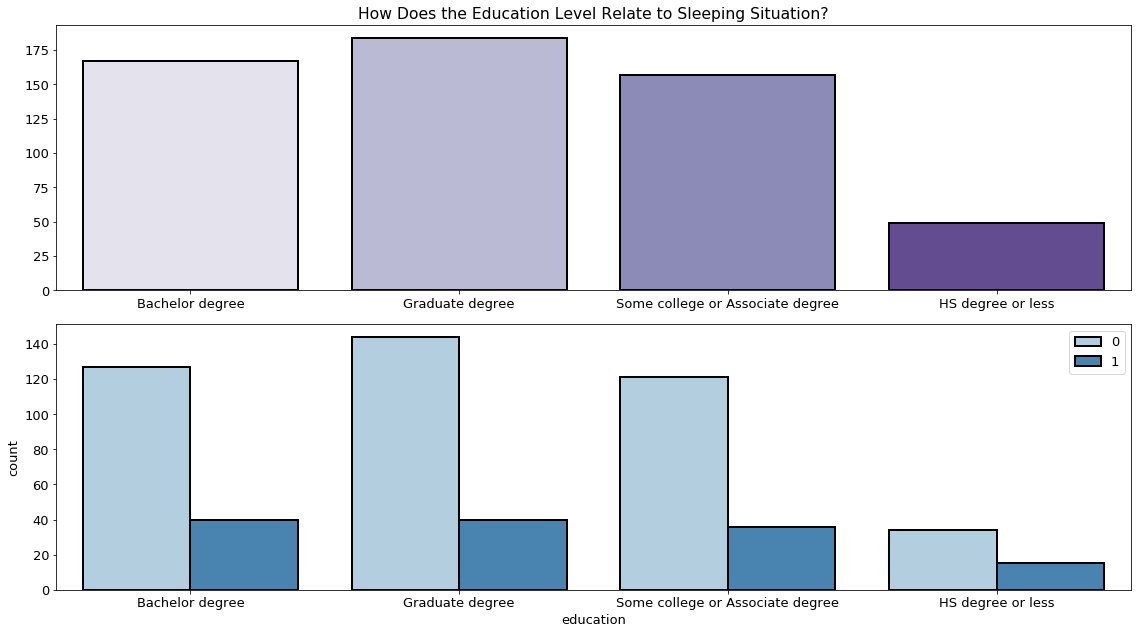

In [45]:
plot_counts(train, 'education', 'separate_bed', 'How Does the Education Level Relate to Sleeping Situation?')

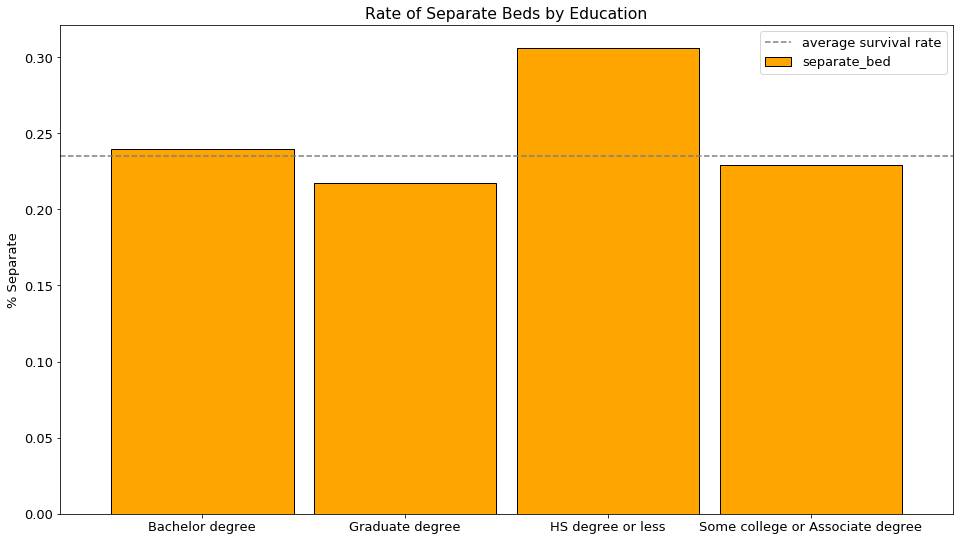

In [22]:
train.groupby('education').separate_bed.mean().plot.bar(ec='black', 
                                                        fc='orange', width=.9)

# plt.hlines(height, starts, ends) (is like y, xmin, xmax)
plt.hlines(train.separate_bed.mean(), *plt.xlim(), ls='--', color='grey', 
           label='average separate bed rate')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('% Separate')
plt.title('Rate of Separate Beds by Education')

plt.legend()
plt.show()

#### $Chi^2$ Test

In [81]:
# crosstab of target by age
edu_obs = pd.crosstab(train.separate_bed, train.education)
edu_obs

education,Bachelor degree,Graduate degree,HS degree or less,Some college or Associate degree
separate_bed,,,,
0,127,144,34,121
1,40,40,15,36


In [82]:
# Chi^2 test returns 4 variables
chi2, p, degf, expected = stats.chi2_contingency(edu_obs)

null_hypothesis = "Education Level and Sleeping Sitation are independent"

# significance
alpha = .05

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

print(p)

We fail to reject the null hypothesis that Education Level and Sleeping Sitation are independent
0.6275542881050433


<div class="alert alert-block alert-info">
    <b>Summary</b>: These education level groups surpass the mean for the population for couples in separate beds:
    <li>High School or less</li>
    <li>Bachelor's degree</li>
    $Chi^2$ Test determined that these are independent.
    </div>

> **Which census region are couples more likely to sleep seperately?**

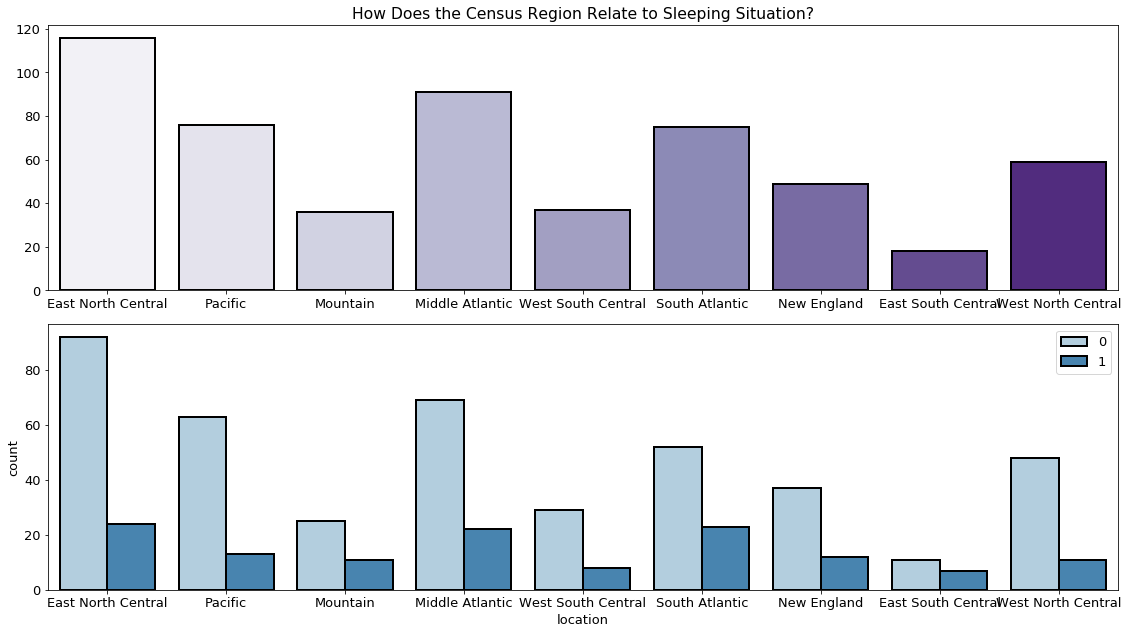

In [21]:
plot_counts(train, 'location', 'separate_bed', 'How Does the Census Region Relate to Sleeping Situation?')

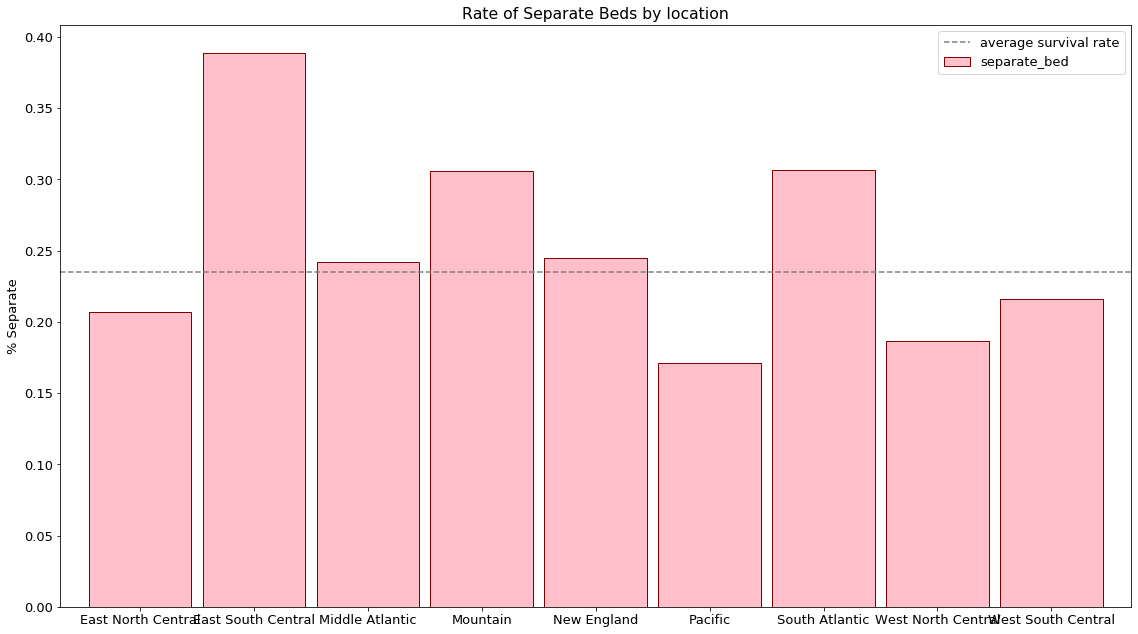

In [20]:
train.groupby('location').separate_bed.mean().plot.bar(ec='maroon', 
                                                       fc='pink', width=.9)

# plt.hlines(height, starts, ends) (is like y, xmin, xmax)
plt.hlines(train.separate_bed.mean(), *plt.xlim(), ls='--', 
           color='grey', label='average separate bed rate')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('% Separate')
plt.title('Rate of Separate Beds by location')

plt.tight_layout()
plt.legend()
plt.show()

#### $Chi^2$ Test

In [84]:
# crosstab of target by age
loc_obs = pd.crosstab(train.separate_bed, train.location)
loc_obs

location,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
separate_bed,,,,,,,,,
0,92,11,69,25,37,63,52,48,29
1,24,7,22,11,12,13,23,11,8


In [85]:
# Chi^2 test returns 4 variables
chi2, p, degf, expected = stats.chi2_contingency(loc_obs)

null_hypothesis = "Education Level and Sleeping Sitation are independent"

# significance
alpha = .05

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

print(p)

We fail to reject the null hypothesis that Education Level and Sleeping Sitation are independent
0.37352490745037314


<div class="alert alert-block alert-info">
    <b>Summary</b>: These census location groups surpass the mean for the population for couples in separate beds:
    <li>East South Central</li>
    <li>South Atlantic</li>
    <li>Mountain</li>
     $Chi^2$ Test determined that these are independent.
    </div>

> **Are there any combinations of features of couples that are more likely to sleep apart?**

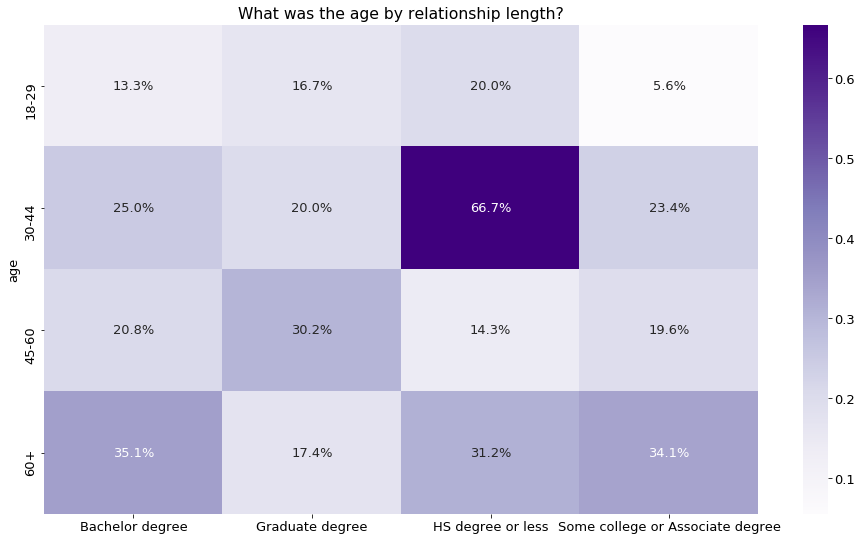

In [32]:
#train.groupby(['age', 'education']).separate_bed.mean()

ctab = pd.crosstab(train['age'], train.education, values=train.separate_bed, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')

plt.title('What was the age by relationship length?')
plt.xlabel('')

plt.show()

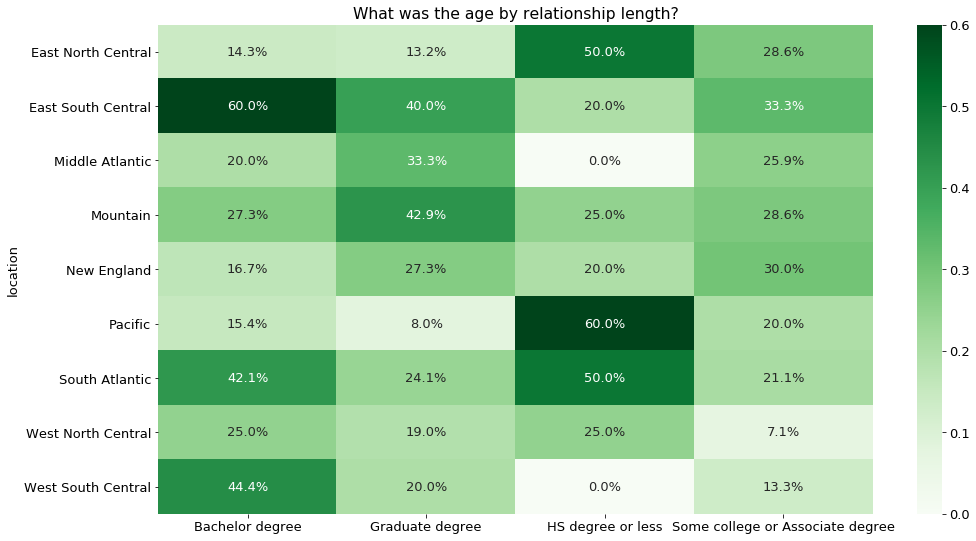

In [38]:
#train.groupby(['location', 'education']).separate_bed.mean()

ctab = pd.crosstab(train['location'], train.education, values=train.separate_bed, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.1%')

plt.title('What was the age by relationship length?')
plt.xlabel('')

plt.show()

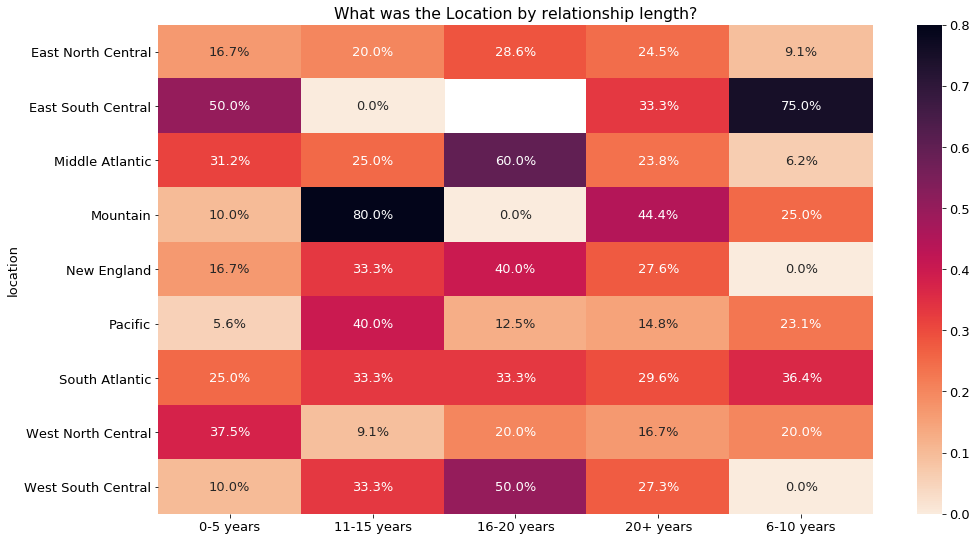

In [98]:
#train.groupby(['location', 'rel_length']).separate_bed.mean()

ctab = pd.crosstab(train['location'], train.rel_length, values=train.separate_bed, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='rocket_r', fmt='.1%')

plt.title('What was the Location by relationship length?')
plt.xlabel('')

plt.show()

<div class="alert alert-block alert-info">
    <b>Summary</b>: These combination of groups significantly surpass the mean for the population for couples in separate beds:
    <li>Region: Mountain, Relation Length: 11-15 years = 80%</li>
    <li>Region: East South Central, Relation Length: 6-10 years = 75%</li>
    <li>Age: 30-44, Education: HS degree or less = 66.7%</li>
    <li>Region: East South Central & Pacfic, Education: HS degree or less = 60%</li>
    <li>Region: Mid Atlantic, Relation Length: 16-20 years = 60%</li>
    These combinations may be worth looking into further.
    </div>